In [1]:
from qiskit import *
from qiskit.tools.visualization import plot_histogram
%matplotlib inline

# Manual Implementation

In [2]:
#providing a secrect number for search
secretnumber = '1000101'

In [3]:
circuit = QuantumCircuit(8,7) #qubit with length of secretnumber + 1

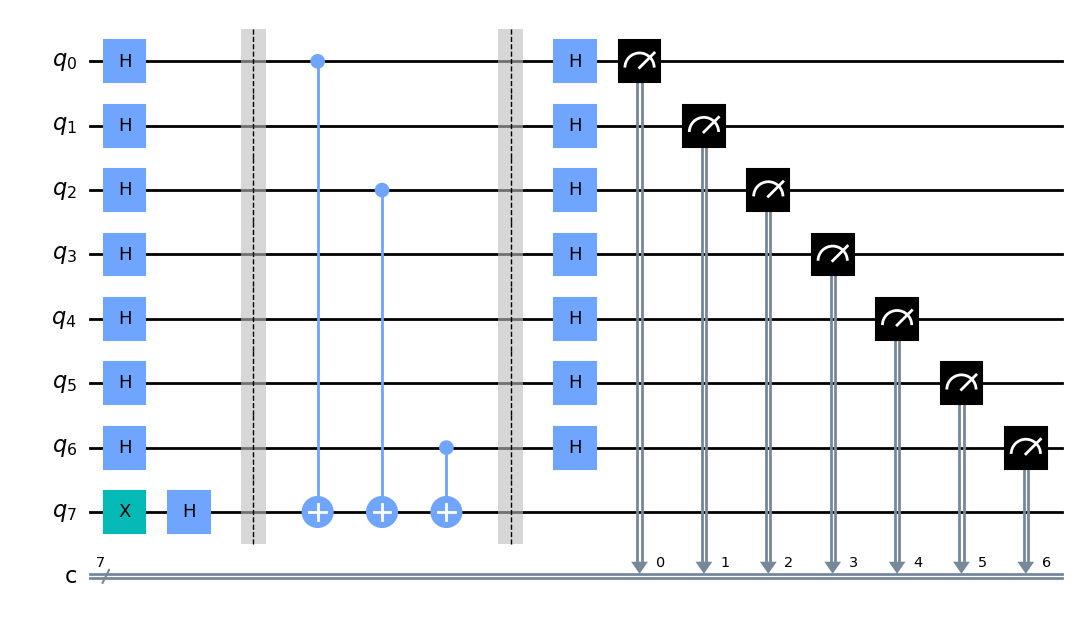

In [4]:
circuit.h(range(7)) # for this algo
circuit.x(7) # for ancilla(last qubit)
circuit.h(7)
circuit.barrier()

circuit.cx(0,7) # cx with control where there is "1" in secretnumber
circuit.cx(2,7)
circuit.cx(6,7)

circuit.barrier()

circuit.h(range(7))

circuit.measure([0,1,2,3,4,5,6],[0,1,2,3,4,5,6])


circuit.draw('mpl')


In [5]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit,simulator,shots=100).result()
counts = result.get_counts()
print(counts)

{'1000101': 100}


# Improved Implementation

In [6]:
circuit = QuantumCircuit(len(secretnumber) + 1,len(secretnumber))

index 0 is 1
index 1 is 0
index 2 is 1
index 3 is 0
index 4 is 0
index 5 is 0
index 6 is 1


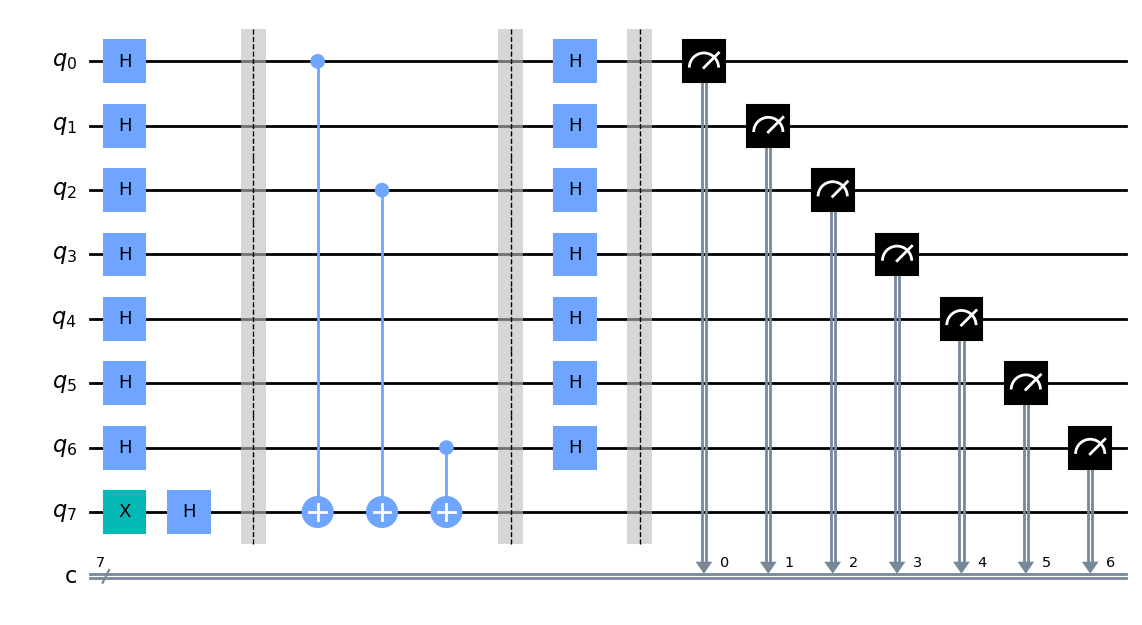

In [7]:
circuit.h(range(len(secretnumber))) 
circuit.x(len(secretnumber)) 
circuit.h(len(secretnumber))

circuit.barrier()

for index,one in enumerate(secretnumber[::-1]): #reversing the string
    print(f"index {index} is {one}")
    if one == '1':
        circuit.cx(index,len(secretnumber))
        
        


circuit.barrier()

circuit.h(range(len(secretnumber)))

circuit.barrier()

circuit.measure(range(len(secretnumber)),range(len(secretnumber)))


circuit.draw('mpl')

In [8]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit,simulator,shots=100).result()
counts = result.get_counts()
print(counts)

{'1000101': 100}
